In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [4]:
from soundNet2 import *

In [9]:
DEVICE = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
ROOT_DIR = '/beegfs/bva212/fma_small_cqt/'
PATH_FILE = 'checksums'
BATCH_SIZE = 32
VAL_SPLIT = 0.2
TRANSFORM_PROB  = 0.5
SR = 22050
MODEL_SAVE_PATH = '/beegfs/bva212/soundNet_time_reversal_8Oct_96_8.pth'

In [10]:
start = time.time()
soundnet = soundNet(DEVICE, ROOT_DIR, PATH_FILE, SR, BATCH_SIZE, VAL_SPLIT, TRANSFORM_PROB)
print(f'time for instantiating sound net object - {time.time() - start}')

Getting Train & Validation Datasets
Excluding these 3 files - ['098/098567.mp3_cqt.npy', '098/098565.mp3_cqt.npy', '098/098569.mp3_cqt.npy']
There are a total of 7836 music files in the root directory
# Training samples: 6268 	 # Validation samples: 1567
	 --Done
Creating Train & Validation Dataloaders
Length of Train dataloader: 196 	 Validation dataloader: 49
	 --Done
Instantiating 5 Conv Layer Sound Net Model
	 --Done
Init actions done
time for instantiating sound net object - 15.183133363723755


In [6]:
soundnet.model

DataParallel(
  (module): snet(
    (conv_layers): Sequential(
      (0): Conv2d(1, 16, kernel_size=(5, 5), stride=(2, 2), padding=(2, 2))
      (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace)
      (3): MaxPool2d(kernel_size=3, stride=(1, 2), padding=0, dilation=1, ceil_mode=False)
      (4): Conv2d(16, 32, kernel_size=(5, 5), stride=(2, 2), padding=(2, 2))
      (5): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (6): ReLU(inplace)
      (7): MaxPool2d(kernel_size=3, stride=(1, 2), padding=0, dilation=1, ceil_mode=False)
      (8): Conv2d(32, 64, kernel_size=(4, 4), stride=(2, 2), padding=(2, 2))
      (9): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (10): ReLU(inplace)
      (11): Conv2d(64, 128, kernel_size=(4, 4), stride=(2, 2), padding=(2, 2))
      (12): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    

In [7]:
start = time.time()
next(iter(soundnet.dataloaders['train']))
print(f'time for fetching one batch - {time.time() - start}')

time for fetching one batch - 0.22138381004333496


Instantiating Optimzer, Loss Criterion, Scheduler
	 --Done
Training started
Epoch 1/25
----------
train Loss: 0.5827 Acc: 0.713896
valid Loss: 0.4381 Acc: 0.8864

Epoch 2/25
----------
train Loss: 0.4110 Acc: 0.907996
valid Loss: 0.3956 Acc: 0.9209

Epoch 3/25
----------
train Loss: 0.3961 Acc: 0.919496
valid Loss: 0.3996 Acc: 0.9049

Epoch 4/25
----------
train Loss: 0.3830 Acc: 0.931996
valid Loss: 0.4177 Acc: 0.8883

Epoch 5/25
----------
train Loss: 0.3773 Acc: 0.936796
valid Loss: 0.3852 Acc: 0.9266

Epoch 6/25
----------
train Loss: 0.3788 Acc: 0.931796
valid Loss: 0.4057 Acc: 0.9030

Epoch 7/25
----------
train Loss: 0.3709 Acc: 0.943096
valid Loss: 0.4225 Acc: 0.8826

Epoch 8/25
----------
train Loss: 0.3641 Acc: 0.949196
valid Loss: 0.3952 Acc: 0.9145

Epoch 9/25
----------
train Loss: 0.3607 Acc: 0.953696
valid Loss: 0.3582 Acc: 0.9572

Epoch 10/25
----------
train Loss: 0.3599 Acc: 0.952396
valid Loss: 0.3522 Acc: 0.9617

Epoch 11/25
----------
train Loss: 0.3585 Acc: 0.9542

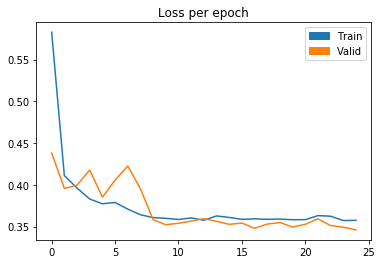

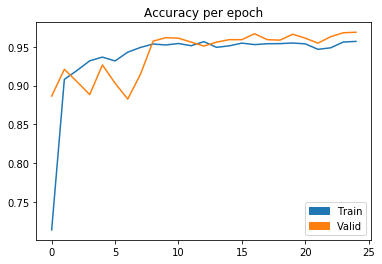

In [8]:
soundnet.train(num_epochs= 25, learning_rate=1e-4, print_every=1, verbose=True)

In [13]:
torch.save(soundnet.model.state_dict(), '/beegfs/bva212/soundNet_time_reversal_8Oct_96_8.pth')

In [1]:
import scipy, IPython.display as ipd

In [3]:
ipd.Audio('/beegfs/bva212/fma_small_cqt/000/000002.mp3_cqt.npy', rate=22050)

(array([[-0.0148525 -2.67314499e-05j, -0.00126824+1.63535318e-02j,
          0.02034269+2.49265852e-03j, ...,  0.02187591+1.38464477e-01j,
          0.13353485+1.17871269e-02j,  0.04542453-1.21932882e-01j],
        [ 0.02900387+7.80491088e-04j,  0.02188729-2.26926112e-02j,
         -0.00666821-3.64664356e-02j, ..., -0.04502439+1.37200078e-01j,
          0.10426323+5.77049599e-02j,  0.05490968-8.27136989e-02j],
        [ 0.02171748-8.46881662e-04j,  0.00275264-2.71438173e-02j,
         -0.03268043-1.87678246e-02j, ...,  0.00692479-6.65033861e-02j,
          0.00238576-5.79922856e-02j, -0.02016134-6.90022756e-02j],
        ...,
        [ 0.        +0.00000000e+00j,  0.00261387-3.38987305e-03j,
         -0.00556244-4.88689216e-02j, ...,  0.06858323-5.25987236e-02j,
          0.01133784-5.96943926e-02j, -0.0349913 +5.90061178e-02j],
        [ 0.        +0.00000000e+00j, -0.00019534-5.76976965e-03j,
          0.00235123-2.07346591e-02j, ...,  0.07176854-5.28033956e-02j,
          0.00919129

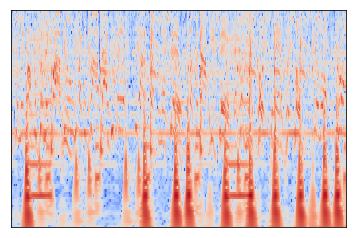

In [12]:
waveform, fs = librosa.load('/beegfs/bva212/fma_small/000/000002.mp3')
soundnet.cqt_transform(waveform)